## **M6_AI1_RECAUDACIÓN DE PELÍCULAS (IMDB)**


In [127]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
import math 
import statistics as st
from collections import Counter
import scipy.stats as sp
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# **Ejercicio 1**
---
Preprocesado de conversión de tipos de datos (comentado arriba). 

Se deben realizar dos tipos de preprocesado: 

*   Convertir todas las variables categóricas en numéricas. 
*   Tanto “budget” como “worldwide_gross_income” están en formato string. Hay que eliminar el símbolo de dólar para convertir a entero. 



In [186]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

#Cargo el dataset
url = 'https://raw.githubusercontent.com/juliajjm/modulo6_practica1/main/data_machine.csv'

#Quitamos el signo $
df_peliculas= pd.read_csv(url, sep = ';',decimal =',')
df_peliculas["budget"] = df_peliculas["budget"].str.replace("$" , "" , regex = True)
df_peliculas["worlwide_gross_income"] = df_peliculas["worlwide_gross_income"].str.replace("$" , "" , regex = True)
df_peliculas.head()



,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0010323,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,Werner Krauss,8.1,55601,7.99,18000,8811,237,160
1,tt0012190,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Rex Ingram,Pomeroy Cannon,7.2,3058,6.61,800000,9183673,45,16
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,Charles Chaplin,Edna Purviance,7,4735,6.61,351000,11233,37,24
3,tt0015864,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,Charles Chaplin,Charles Chaplin,8.2,97480,8.13,923000,26916,190,125
4,tt0018455,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,F.W. Murnau,George O'Brien,8.1,46069,7.97,200000,121107,250,186


In [187]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

#Cargo el dataset
url = 'https://raw.githubusercontent.com/juliajjm/modulo6_practica1/main/data_machine.csv'

#Quitamos el signo $
df_peliculas= pd.read_csv(url, sep = ';',decimal =',')
df_peliculas["budget"] = df_peliculas["budget"].str.replace("$" , "" , regex = True)
df_peliculas["worlwide_gross_income"] = df_peliculas["worlwide_gross_income"].str.replace("$" , "" , regex = True)


#Transformamos las variables a numericas
df_peliculas[["duration" , "avg_vote" , "votes" , "avg_vote_weighted" , "budget" , "worlwide_gross_income" , "reviews_from_users" ,"reviews_from_critics"]] = df_peliculas[["duration" , "avg_vote" , "votes" , "avg_vote_weighted" , "budget" , "worlwide_gross_income" , "reviews_from_users" ,"reviews_from_critics"]].apply(pd.to_numeric)


#genre, duration, country, director, actors y Budget.
df_peliculas_new = df_peliculas[["genre" , "duration" , "country" , "director" , "actors" , "budget" , "worlwide_gross_income"]]
df_peliculas_new.head()

#Transformamos las variables categoricas a numericas 
#usamos LabelEncoder
df_peliculas_new.genre = le.fit_transform(df_peliculas_new.genre)
df_peliculas_new.country = le.fit_transform(df_peliculas_new.country)
df_peliculas_new.director = le.fit_transform(df_peliculas_new.director)
df_peliculas_new.actors = le.fit_transform(df_peliculas_new.actors)

df_peliculas_new.head()




/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,genre,duration,country,director,actors,budget,worlwide_gross_income
0,407,76,281,3282,3869,18000,8811
1,377,150,807,3145,3040,800000,9183673
2,372,82,807,561,1058,351000,11233
3,94,95,807,561,624,923000,26916
4,372,94,807,1146,1301,200000,121107


Para transformar las variables categóricas a numéricas he utilizado LabelEncoder, que codifica las etiquetas objetivo con un valor entre 0 y n_classes-1. Es relevante tener en cuenta el orden alfabético y los países, dependiendo de donde sea el espectador si influye en los resultados.

Considero que LabelEncoder da claridad y una mejor estructura cuando transformo las variables categóricas a numéricas, ya que transformamos etiquetas no numéricas (siempre que sean hash y comparables) en etiquetas numéricas.



In [ ]:
#Utilizo esta funcion para ver el tipo de variables 
print(df_peliculas_new.info())

# **Ejercicio 2**
---
Generación de los dos modelos que se piden. 

Se pide: 

1.Aplicar el algoritmo de ÁRBOLES de DECISIÓN para la estimación de la recaudación de una película, dadas las variables: genre, duration, country, director, actors y Budget.

variable objetivo: Worldwide_gross_income: ingresos generados en todo el mundo. 

Para el 1, dado que tenemos variables continuas, considero que se trata de un AD de Regresión.
Regression: algoritmos supervisados de regresión para predecir variables continuas. Ejemplo: estimación de precios de automóviles.
Tenemos que predecir una variable objetivo



In [189]:
#Division Train/Test
#nuestra variable a predecir es worlwide_gross_income

X = df_peliculas_new.iloc[:,0:-1]
y = df_peliculas_new.iloc[:,-1]


In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6064, 6) (6064,)
(2600, 6) (2600,)


In [191]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [192]:
#Bucle para la selección de "max_depth"
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [193]:
df.set_index("max_depth", inplace=True)

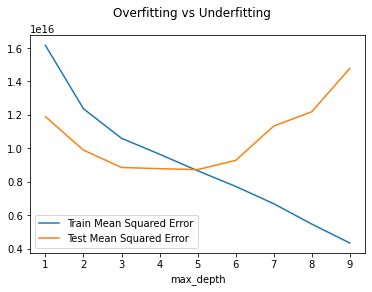

In [194]:
df["mse_train"].plot(label="Train Mean Squared Error")
df["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

Conlusiones del gráfico 
---
Calculamos el error medio cuadrático. Como se puede ver el error medio cuadrático ha ido bajando para Train porque he ido sobreajustando. Sin embargo el Test ha bajado hasta un max depth de 4 y luego el error medio cuadrático sube para Test.



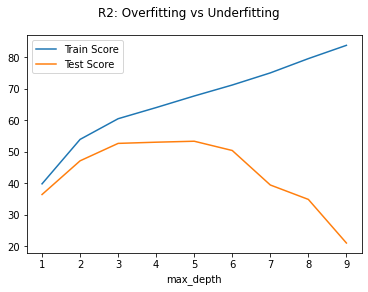

In [195]:
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

Conlusiones del gráfico
---
Con este gráfico observo como se comporta el modelo.La precisión del modelo en Train aumenta conforme el max depth del modelo va siendo mayor (más complejo). Es decir el modelo Train se esta ajustando mucho.
En cambio para el modelo Test Score, vemos que el modelo al principio incrementa, hay un max depth interesante en el valor 5 (es donde deberíamos parar) ya que después de 5 los valores bajan y disminuye su capacidad predictiva.
Luego realizamos el entrenamiento del modelo, se obtiene un 60-61% de R2 para un max depth de Test Score de 5.

In [196]:
#Entrenamiento y evaluación del modelo 1
from sklearn.tree import plot_tree
tree_model = DecisionTreeRegressor(random_state=0, max_depth=3)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
print (r2_score(y_train, pred_train))

0.6052486806043749


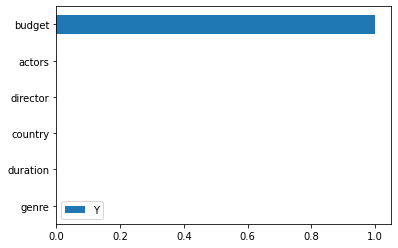

In [197]:
#Cálculo de la Importancia de las Variables (modelo 1)
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=X.columns, index=["Y"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

Conclusiones
---
Observo que budget es la variable que más importancia según el arbol de decisión tiene en cuanto a la estimación de la recaudación de una película. 

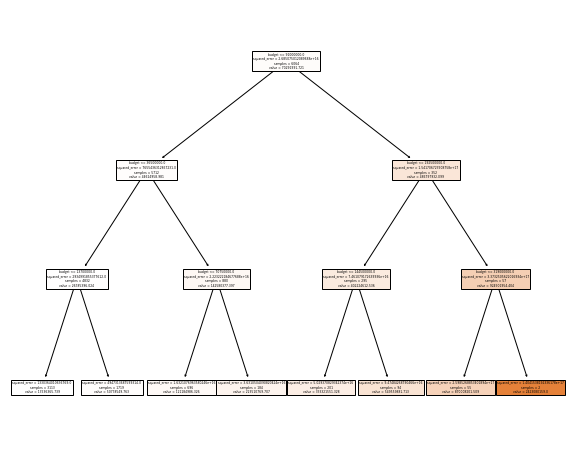

In [198]:
#Generación del Grafo para su análisis (modelo 1)
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X.columns, class_names=["Y"])
plt.show()

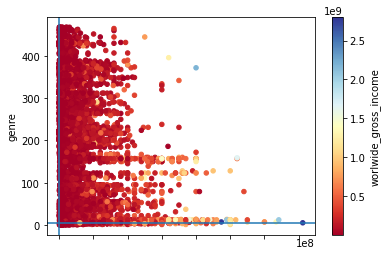

In [199]:
df_peliculas_new.plot.scatter(x= "budget", y="genre", c="worlwide_gross_income", cmap=plt.cm.RdYlBu)
plt.axvline(26.85)
plt.axhline(4.792)

Conclusiones
---
Analizo la división de los datos, observo que los valores de Y para valores bajos se agrupan bastante, en cambio los valores altos no estan tan agrupados.

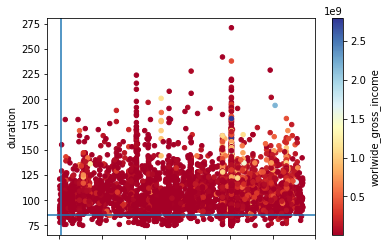

In [200]:
df_peliculas_new.plot.scatter(x="country", y="duration", c="worlwide_gross_income", cmap=plt.cm.RdYlBu)
plt.axvline(4.792)
plt.axhline(85.335)

Conclusiones
---
Los valores de Y para valores bajos se agrupan bastante pero si que hay algunos valores de Y para valores bajos que no estan agrupados.

# **Ejercicio 3**

---

Aplicar el algoritmo de ÁRBOLES de DECISIÓN para la estimación de la media ponderada de los votos en IMDB (avg_vote_weighted) atendiendo a las variables: genre, duration, country, director, actors, budget, worldwide_gross_income, reviews_from_users y reviews_from_critics.

In [201]:
#genre, duration, country, director, actors , budget , worldwide_gross_income, reviews_from_users, reviews_from_critics , avg_vote_weighted
df_peliculas2 = df_peliculas[["genre" , "duration" , "country" , "director" , "actors" , "budget" , "worlwide_gross_income"
, "reviews_from_users" , "reviews_from_critics" , "avg_vote_weighted" ]]


df_peliculas2.genre = le.fit_transform(df_peliculas2.genre)
df_peliculas2.country = le.fit_transform(df_peliculas2.country)
df_peliculas2.director = le.fit_transform(df_peliculas2.director)
df_peliculas2.actors = le.fit_transform(df_peliculas2.actors)
df_peliculas2.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,genre,duration,country,director,actors,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,avg_vote_weighted
0,407,76,281,3282,3869,18000,8811,237,160,7.99
1,377,150,807,3145,3040,800000,9183673,45,16,6.61
2,372,82,807,561,1058,351000,11233,37,24,6.61
3,94,95,807,561,624,923000,26916,190,125,8.13
4,372,94,807,1146,1301,200000,121107,250,186,7.97


In [202]:
#Division Train/Test
#nuestra variable dependiente (a predecir) es avg_vote_weighted

X = df_peliculas2.iloc[:,0:-1]
y = df_peliculas2.iloc[:,-1]

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6064, 9) (6064,)
(2600, 9) (2600,)


In [204]:
#Bucle para la selección de "max_depth"
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [205]:
df.set_index("max_depth", inplace=True)

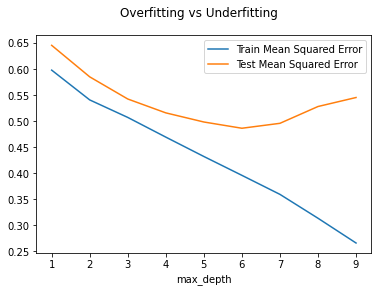

In [206]:
df["mse_train"].plot(label="Train Mean Squared Error")
df["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

Conclusiones del gráfico
---

Calculamos el error medio cuadrático. Como se puede ver el error medio cuadrático ha ido bajando para Train porque he ido sobreajustando. Sin embargo el Test ha bajado hasta un max depth de 6-6.5 y luego el error medio cuadrático de Test sube.

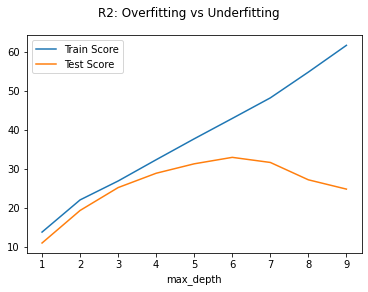

In [207]:
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

Conclusiones del gráfico
---

La precisión del modelo en Train aumenta conforme el max depth del modelo va siendo mayor (más complejo). Es decir el modelo Train se esta ajustando mucho. En cambio para el modelo Test Score, vemos que el modelo al principio incrementa, hay un max depth interesante en el valor 6 (es donde deberíamos parar) ya que después de 6 los valores bajan y disminuye su capacidad predictiva. Luego realizamos el entrenamiento del modelo, se obtiene un 27 % de R2 para un max depth de Test Score de 6.

In [208]:
#Entrenamiento y evaluación del modelo
from sklearn.tree import plot_tree
tree_model = DecisionTreeRegressor(random_state=0, max_depth=3)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
print (r2_score(y_train, pred_train))

0.26841970511460467


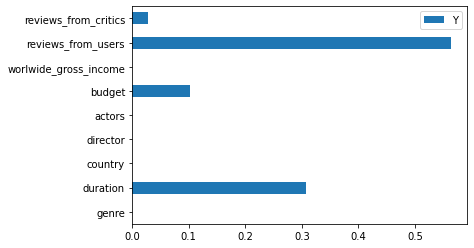

In [209]:
#Calculo la importancia de las variables 
df_imp1 = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=X.columns, index=["Y"])
df_imp1.T.plot.barh()
plt.legend()
plt.show();

Conclusiones
---

Observo que reviews_from_users es la variable que más importancia según el arbol de decisión tiene en cuanto a la estimación de la media ponderada de los votos en IMDB (avg_vote_weighted), la segunda variable que más relevancia tiene es duration, en tercer lugar budget y en cuarta posición review_from_critics.

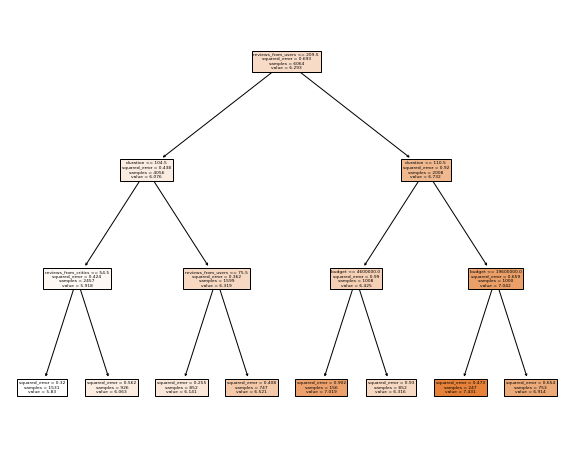

In [210]:
#Generacion del grafo para su analisis 
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X.columns, class_names=["Y"])
plt.show()


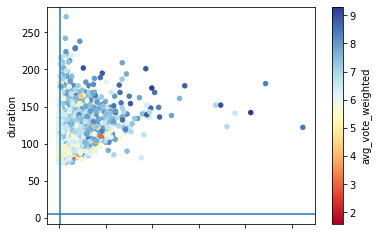

In [211]:
df_peliculas2.plot.scatter(x= "reviews_from_users", y="duration", c="avg_vote_weighted", cmap=plt.cm.RdYlBu)
plt.axvline(26.85)
plt.axhline(4.792)

Conclusiones
---
Observo que los valores elevados de Y se agrupan bastante, con lo cual se oberva un patrón. Los valores medios de Y también estan agrupados. 
También puedo destacar que hay algunos valores elevados de Y que no siguen el patrón y no estan agrupados, podrían ser outliers.

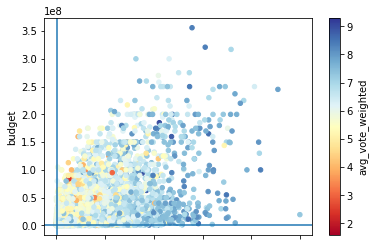

In [212]:
df_peliculas2.plot.scatter(x="reviews_from_critics", y="budget", c="avg_vote_weighted", cmap=plt.cm.RdYlBu)
plt.axvline(4.792)
plt.axhline(85.335)

Conclusiones
---
Veo que los valores elevados de Y estan bastante agrupados y veo otro grupo de los valores medios de Y (5-6).

2.Generación de los dos modelos que se piden
Como se puede observar he generado los dos modelos que se piden. Ahora comentaré la elección de los parámetros de los modelos finales.

# **Ejercicio 4**

---

Comentarios sobre la elección de los parámetros de los modelos finales. 

Para ambos modelos (ejercicio 2 y ejercicio 3) he utilizado un AD de Regresión, ya que en ambos casos tengo variables continuas y considero que es el modelo más adecuado. 

El AD de Regresión forma parte de los algoritmos supervisados ya que es un modelo que que trata de realizar una predicción/estimación de valores de una variable objetivo. 

En el ejercicio 2 la variable objetivo a predecir es Worldwide_gross_income. Y en el ejercicio 3 es avg_vote_weighted.


**Modelo 1 (ejercicio 2).** 

Estimación de la recaudación de una película, dadas las variables: genre, duration, country, director, actors y Budget.

**Modelo 2 (ejercicio 3).** 

Estimación de la media ponderada de los votos en IMDB (avg_vote_weighted) atendiendo a las variables: genre, duration, country, director, actors, budget, worldwide_gross_income, reviews_from_users y reviews_from_critics.






# **Ejericio 5**

---

Comentarios sobre los resultados. 
He añadido los comentarios correspondientes para los resultados de cada modelo después de los gráficos y de los resultados obtenidos. Ver Ejercicio 2 & Ejercicio 3 y los comentarios adjuntos para cada modelo.

**Modelo 1 (ejercicio 2)**

Estimación de la recaudación de una película, dadas las variables: genre, duration, country, director, actors y Budget.

**Modelo 2 (ejercicio 3).**

Estimación de la media ponderada de los votos en IMDB (avg_vote_weighted) atendiendo a las variables: genre, duration, country, director, actors, budget, worldwide_gross_income, reviews_from_users y reviews_from_critics.



# **Ejercicio 6**

---

Estimación de la recaudación de dos películas con los valores que queráis; eligiendo país, género, director, etc., a vuestro gusto. 
Películas elegidas: The Gold Rush y Oklahoma!
Considero que la variable que describe mejor la recaudación es worlwide_gross_income.


In [163]:
df_peliculas3 = df_peliculas.loc[(df_peliculas.original_title == "The Gold Rush") | (df_peliculas.original_title == "Oklahoma!")]
#df_peliculas3.head()

df_peliculas3_new = df_peliculas3[["genre" , "duration" , "country" , "director" , "actors" , "budget" , "worlwide_gross_income" ]]
#df_peliculas3_new

#Transformamos las variables categoricas a numericas 
#usamos LabelEncoder
df_peliculas3_new.genre = le.fit_transform(df_peliculas3_new.genre)
df_peliculas3_new.country = le.fit_transform(df_peliculas3_new.country)
df_peliculas3_new.director = le.fit_transform(df_peliculas3_new.director)
df_peliculas3_new.actors = le.fit_transform(df_peliculas3_new.actors)
#df_peliculas3_new.original_title = le.fit_transform(df_peliculas3_new.original_title)

df_peliculas3_new.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,genre,duration,country,director,actors,budget,worlwide_gross_income
3,0,95,0,0,0,923000,26916
99,1,145,0,1,1,5000000,15520


In [164]:
#Division Train/Test
#nuestra variable dependiente (a predecir) es worlwide_gross_income

X = df_peliculas3_new.iloc[:,0:-1]
y = df_peliculas3_new.iloc[:,-1]

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1, 6) (1,)
(1, 6) (1,)


In [166]:
#Bucle para la selección de "max_depth"
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

In [167]:
df.set_index("max_depth", inplace=True)

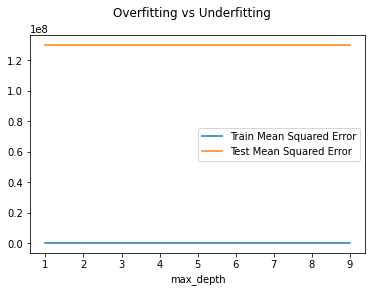

In [168]:
df["mse_train"].plot(label="Train Mean Squared Error")
df["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

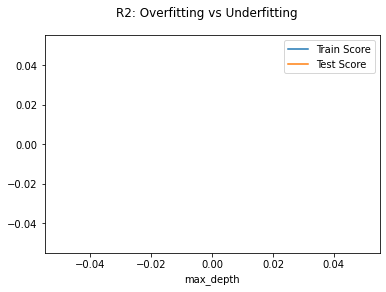

In [169]:
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

In [170]:
#Entrenamiento y evaluación del modelo 
from sklearn.tree import plot_tree
tree_model = DecisionTreeRegressor(random_state=0, max_depth=3)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
print (r2_score(y_train, pred_train))

nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


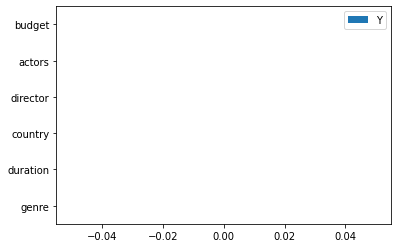

In [171]:
#Calculo de la importancia de las variables 
df_imp2 = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=X.columns, index=["Y"])
df_imp2.T.plot.barh()
plt.legend()
plt.show();

In [ ]:
#Generacion del grafo para su analisis 
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X.columns, class_names=["Y"])
plt.show()

In [ ]:
df_peliculas3_new.plot.scatter(x= "director", y="actors", c= "worldwide_gross_income", cmap=plt.cm.RdYlBu)
plt.axvline(26.85)
plt.axhline(4.792)

Conclusiones ejercicio 6
---

No tengo suficientes datos para extraer conclusiones sólidas, solo tengo los datos de dos películas. Considero que los datos no son suficientes para extraer predicciones y conclusiones.

# **Ejercicio 7**

---

Estimación del rating de dos películas con los valores que queráis; eligiendo país, género, director, etc., a vuestro gusto. 
Películas elegidas: The Gold Rush y Oklahoma!
Considero que la variable que describe mejor el rating es Avg_votes: media de los votos de los usuarios. 



In [174]:
df_peliculas4 = df_peliculas.loc[(df_peliculas.original_title == "The Gold Rush") | (df_peliculas.original_title == "Oklahoma!")]

df_peliculas4_new = df_peliculas4[["genre" , "duration" , "country" , "director" , "actors" , "budget" , "avg_vote" ]]
#df_peliculas3_new

#Transformamos las variables categoricas a numericas 
#usamos LabelEncoder
df_peliculas4_new.genre = le.fit_transform(df_peliculas4_new.genre)
df_peliculas4_new.country = le.fit_transform(df_peliculas4_new.country)
df_peliculas4_new.director = le.fit_transform(df_peliculas4_new.director)
df_peliculas4_new.actors = le.fit_transform(df_peliculas4_new.actors)

df_peliculas4_new.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,genre,duration,country,director,actors,budget,avg_vote
3,0,95,0,0,0,923000,8.2
99,1,145,0,1,1,5000000,7.0


In [175]:
#Division Train/Test
X = df_peliculas4_new.iloc[:,0:-1]
y = df_peliculas4_new.iloc[:,-1]

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1, 6) (1,)
(1, 6) (1,)


In [177]:
#Bucle para la selección de "max_depth"

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

In [178]:
df.set_index("max_depth", inplace=True)

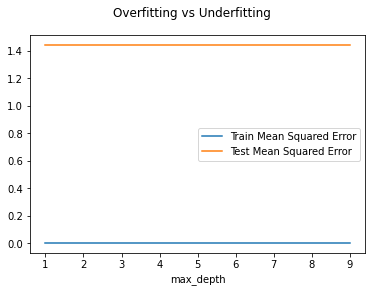

In [179]:
df["mse_train"].plot(label="Train Mean Squared Error")
df["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

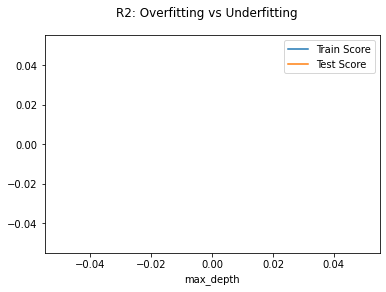

In [180]:
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

In [181]:
#Entrenamiento y evaluación del modelo

from sklearn.tree import plot_tree
tree_model = DecisionTreeRegressor(random_state=0, max_depth=3)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
print (r2_score(y_train, pred_train))

nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


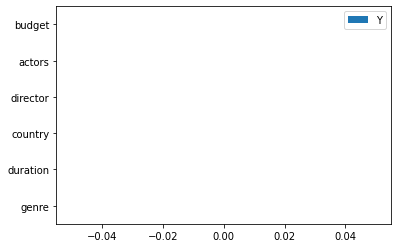

In [182]:
#Cálculo de la Importancia de las Variables

df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=X.columns, index=["Y"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

In [ ]:
#Generación del Grafo para su análisis

plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X.columns, class_names=["Y"])
plt.show()

In [ ]:
df_ini.plot.scatter(x="director", y="country", c="avg_vote", cmap=plt.cm.RdYlBu)
plt.axvline(26.85)
plt.axhline(4.792)

In [185]:
df_ini.plot.scatter(x="budget", y="genre", c="avg_vote", cmap=plt.cm.RdYlBu)
plt.axvline(4.792)
plt.axhline(85.335)

NameError: ignored

Conclusiones ejercicio 7
---

No tengo suficientes datos para extraer conclusiones sólidas, solo tengo los datos de dos películas. Considero que los datos no son suficientes para extraer predicciones y conclusiones.